<h2>Récupération de la structure</h2>

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



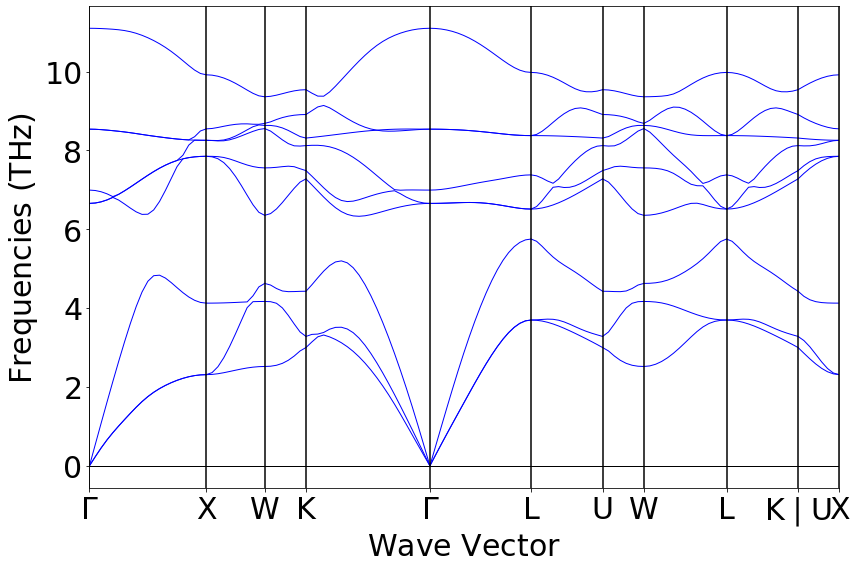

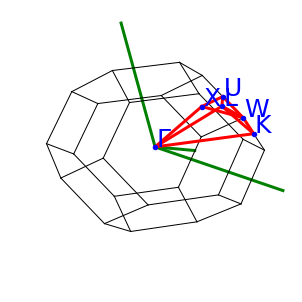

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import * 
import matplotlib.pyplot as plt
with MPRester("VmJsz9RpLnefKgXu") as m:
    
    structure = m.get_phonon_bandstructure_by_material_id("mp-567636")

PhononBSPlotter(structure).get_plot()
PhononBSPlotter(structure).plot_brillouin()

Les bandes acoustiques sont les bandes pour lesquelles la fréquence du phonon associée est nulle au centre de la zone de Briullouin. On distingue donc trois directions: $\Gamma$ - $X$, $K$ - $\Gamma$ et $\Gamma$ - $L$.

<h2> Récupération des données </h2>

In [4]:
ph_bands = PhononBSPlotter(structure).bs_plot_data()
f = ph_bands['frequency']
d = ph_bands['distances']

<h3> Première bande acoustique dans $\Gamma - X$</h3>

In [10]:
v1 = 2*np.pi*np.abs((f[0][0][1]-f[0][0][0])*(10**12))/((d[0][1]-d[0][0])*(10**10))
print("La vitesse du son de la courbe 1 dans la direction Γ - X vaut {} m/s.".format(v1))

La vitesse du son de la courbe 1 dans la direction Γ - X vaut 2657.6583426919146 m/s.


<h3> Deuxième bande acoustique dans $K-\Gamma$</h3>

In [33]:
v2 = 2*np.pi*np.abs((f[3][1][-1]-f[3][1][-2])*(10**12))/((d[3][-1]-d[3][-2])*(10**10))
print("La vitesse du son de la courbe 2 dans la direction K - Γ vaut {} m/s.".format(v2))

La vitesse du son de la courbe 2 dans la direction K - Γ vaut 3476.764429448528 m/s.


<h3> Troisième bande acoustique dans $\Gamma-L$</h3>

In [34]:
v3 = 2*np.pi*np.abs((f[4][2][1]-f[4][2][0])*(10**12))/((d[2][1]-d[2][0])*(10**10))
print("La vitesse du son de la courbe 3 dans la direction Γ - L vaut {} m/s.".format(v3))

La vitesse du son de la courbe 3 dans la direction Γ - L vaut 5552.89230014282 m/s.


<h3>Visualisation graphique </h3>

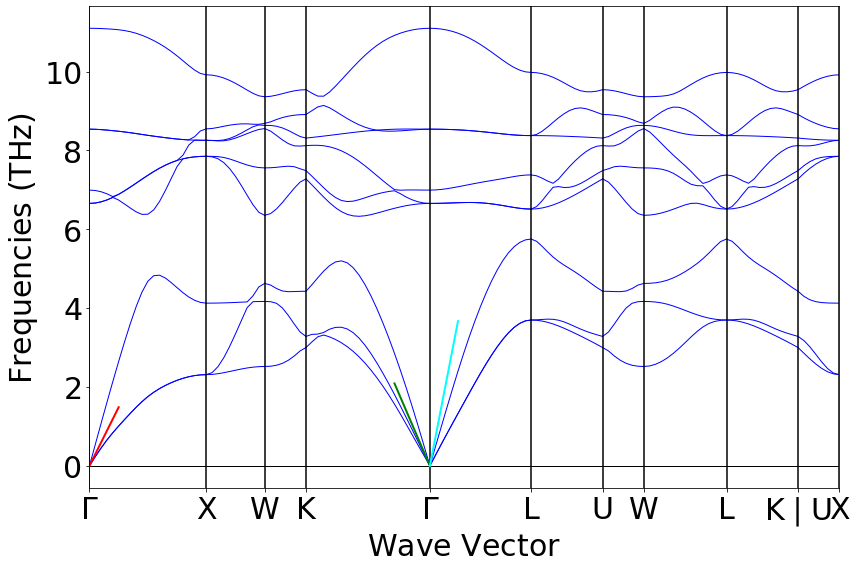

In [32]:
PhononBSPlotter(structure).get_plot()

plt.plot([d[0][0],d[0][5]],[f[0][0][0],f[0][0][8]], c='r', lw=2)
plt.plot([d[3][-1],d[3][-7]],[f[3][1][-1],f[3][1][-8]], c='g', lw=2)
plt.plot([d[4][0],d[4][5]],[f[4][2][0],f[4][2][8]],c='cyan', lw=2)


On peut observer que la vitesse représentée par la pente la première bande acoustique en rouge est inférieure à celle de la deuxième bande en verte qui sont toutes deux inférieures à celle de la troisième bande en cyan. Ces résultats correspondent bien à nos résultats.